In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general, tensor_basis
from quspin.tools.measurements import obs_vs_time
import numpy as np
from matplotlib import pyplot as plt

import spinFuncts as sf

In [6]:
N  = 1        #system size
V  = 0.1        #coupling strength
L  = [0, 0]   #lambda prefix, Jzz_i

S1 = '70'    #spin of 1
S2 = '1/2'    #spin of 2

In [10]:
#define z_i0, phi_i0 -> convert to h, plug in h
#z(0) is the first one? if so, what to set for second??

phi1 = 0
phi2 = 0
z1   = 0
z2   = 0

h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)
J1, J2, zz = sf.getJs(N, S1, S2, h1, h2)

H1 = sf.H_ini(h1, h2, J1, J2)
vals, vects = H1.eigh()

phi1 = np.pi/8
phi2 = 0
z1   = 0.3
z2   = 0

h1, h2 = sf.takeZphi (z1, phi1, z2, phi2)
J1, J2, Jzz = sf.getJs(N, S1, S2, h1, h2)

H2 = sf.H_dyn(h1, h2, L, V, J1, J2, Jzz)
times = np.linspace(0.0, 100.0, 500)

v_t = H2.evolve(vects[0], t0=0, times=times)

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\Desktop\code\spinFuncts.py:48: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:48: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
  H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
  H2 = hamiltonian(static2, [], dtype=np.complex128, basis=basis) #to make operators for 2
C:\Users\Rey\Desktop\code\spinFuncts.py:49: UserWarning: Test for particle conservation not implemented for <c

Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'phi')

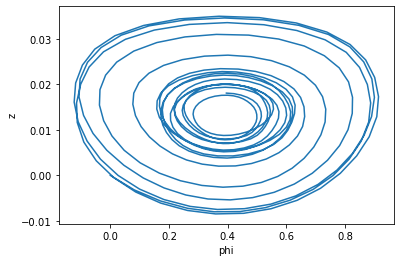

In [11]:
J1_time, J2_time = sf.getObs(v_t, times, J1, J2)
#plt.plot(times, J1_time[2])
#plt.plot(times, J2_time[0])
#plt.ylabel('J_i')
#plt.xlabel('time')

z1, phi1, z2, phi2 = sf.makeZphi_J(J1_time, J2_time)
plt.plot(phi1, z1)
#plt.plot(phi2, z2)
plt.ylabel('z')
plt.xlabel('phi')

C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'time')

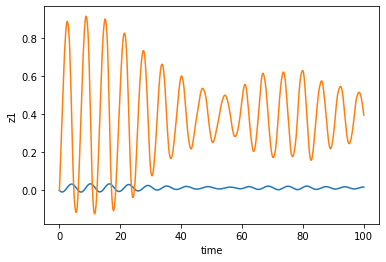

In [12]:
z1, phi1, z2, phi2 = sf.makeZphi_J(J1_time, J2_time)
plt.plot(times, z1)
plt.plot(times, phi1)
plt.ylabel('z1')
plt.xlabel('time')